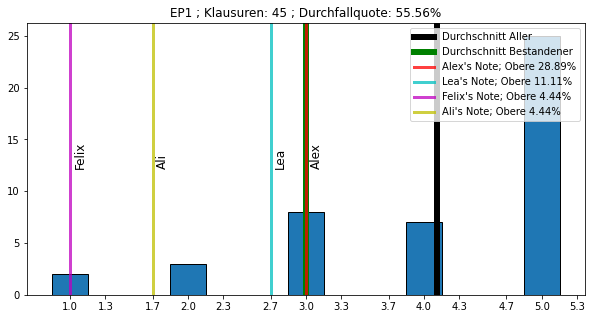

0
11.11111111111111


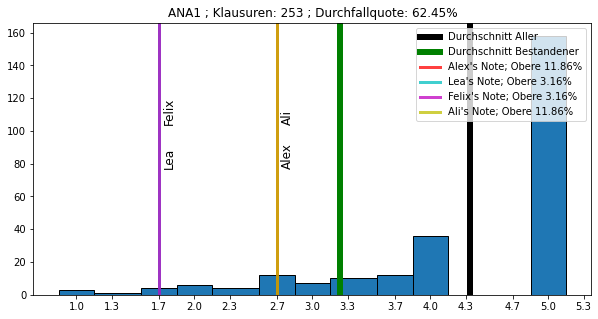

1
14.624505928853754


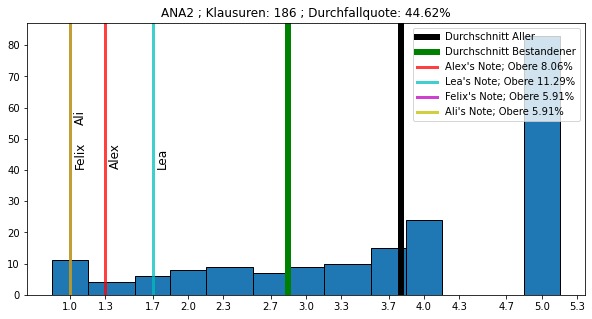

2
20.43010752688172


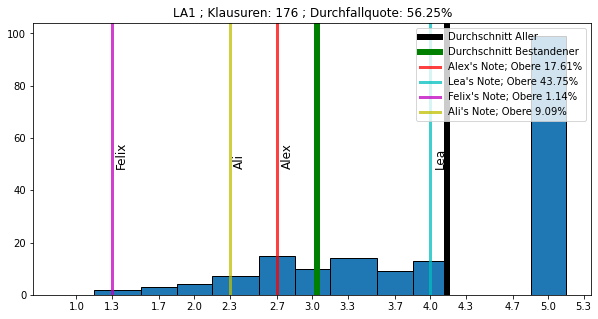

3
31.25


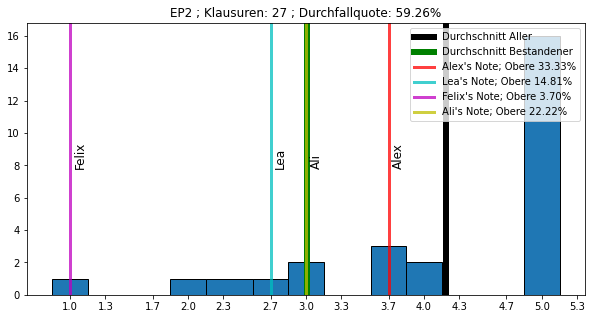

4
22.22222222222222


In [1]:
import numpy as np
import matplotlib.pyplot as plt


ep1=np.array([1,1,2,2,2,3,3,3,3,3,3,3,4,4,4,4])
ep1=np.append(ep1,np.full(22,5))
ep1_nach=np.array([3,4,5,5,4,5,4])
ep1_all=np.append(ep1,ep1_nach)
ep1_note=3.0


ana1 = np.loadtxt("ana1.txt", delimiter='\n', skiprows=1)
ana1_nach = np.loadtxt("ana1_nach.txt", delimiter='\n', skiprows=1)
ana1_all=np.append(ana1,ana1_nach)
ana1_note=2.7

ana2 = np.loadtxt("ana2.txt", delimiter=' ', skiprows=1)
ana2 = np.array([arr[2] for arr in ana2])
ana2_nach = np.loadtxt("ana2_nach.txt", delimiter=' ', skiprows=1)
ana2_nach = np.array([arr[2] for arr in ana2_nach])
ana2_all=np.append(ana2,ana2_nach)
ana2_note=1.3

la1 = np.loadtxt("la1.txt", delimiter=' ', skiprows=1)
la1 = np.array([arr[2] for arr in la1])
la1_nach = np.loadtxt("la1_nach.txt", delimiter=' ', skiprows=1)
la1_nach = np.array([arr[2] for arr in la1_nach])
la1_all=np.append(la1,la1_nach)
la1_note=2.7

ep2 = np.loadtxt("ep2.txt", delimiter=' ', skiprows=1)
ep2 = np.array([arr[2] for arr in ep2])
ep2_all=ep2
ep2_note=3.7

alle=np.array([ep1,ana1,ana2,la1,ep2],dtype=object)
alle=np.array([ep1_all,ana1_all,ana2_all,la1_all,ep2_all],dtype=object)

alex_noten=np.array([ep1_note,ana1_note,ana2_note,la1_note,ep2_note])
klausur_namen=np.array(["Experimentalphysik 1","Analysis 1","Analysis 2","Lineare Algebra 1","Experimentalphysik 2"])
klausur_namen=np.array(["EP1","ANA1","ANA2","LA1","EP2"])
leas_noten=np.array([2.7,1.7,1.7,4,2.7])
felix_noten=np.array([1.0,1.7,1,1.3,1])
ali_noten=np.array([1.7,2.7,1,2.3,3])


noten=np.array([alex_noten,leas_noten,felix_noten,ali_noten])
noten=np.transpose(noten)
noten_namen=np.array(["Alex","Lea","Felix","Ali"])

schnitte=[2.68,2.97,2.33,3.38,3.4]
schnitte=[2.7,3,2.3,3.3,3.3]

colors=["r","c","m","y"]
i=0
def hist(array,noten,namen,klausur_name,colors):
    global i
    bins=np.array([1,1.3,1.7,2,2.3,2.7,3,3.3,3.7,4,4.3,4.7,5,5.3])-0.15
    avg_all=np.mean(array)
    avg_bes=np.mean(array[array<=4.0])
    durchfall=(len(array[array==5])/len(array))
    plt.hist(array,edgecolor = "k",bins=bins)
    plt.axvline(x=avg_all,c='k',linewidth=6,label="Durchschnitt Aller")
    plt.axvline(x=avg_bes,c='g',linewidth=6,label="Durchschnitt Bestandener")
    
    plt.title("{} ; Klausuren: {} ; Durchfallquote: {:.2f}%".format(klausur_name,len(array),durchfall*100))
    
    l=[]
    for note,name,c in zip(noten,noten_namen,colors):
        if note in l:
            plt.text(x=note+0.03,y=len(array)*durchfall/1.5,s=name,rotation=90,size=12)
        else:
            plt.text(x=note+0.03,y=len(array)*durchfall/2,s=name,rotation=90,size=12)
        x=len(array[array<=note])/len(array)*100
        plt.axvline(x=note,c=c,linewidth=3,label="{}'s Note; Obere {:.2f}%".format(name,x),alpha=0.75)
        
        l.append(note)
    
    
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.xticks(bins+0.15, bins+0.15)
    plt.legend(loc='upper right')
    plt.savefig(f"{klausur_name}.pdf",dpi=300,transparent=False)
    plt.show()
    print(i)
    print(len(array[array<=schnitte[i]])/len(array)*100)
    i+=1
    #plt.grid()
    
for array,klausur_name,noten in zip(alle,klausur_namen,noten):
    hist(array,noten,noten_namen,klausur_name,colors)

    


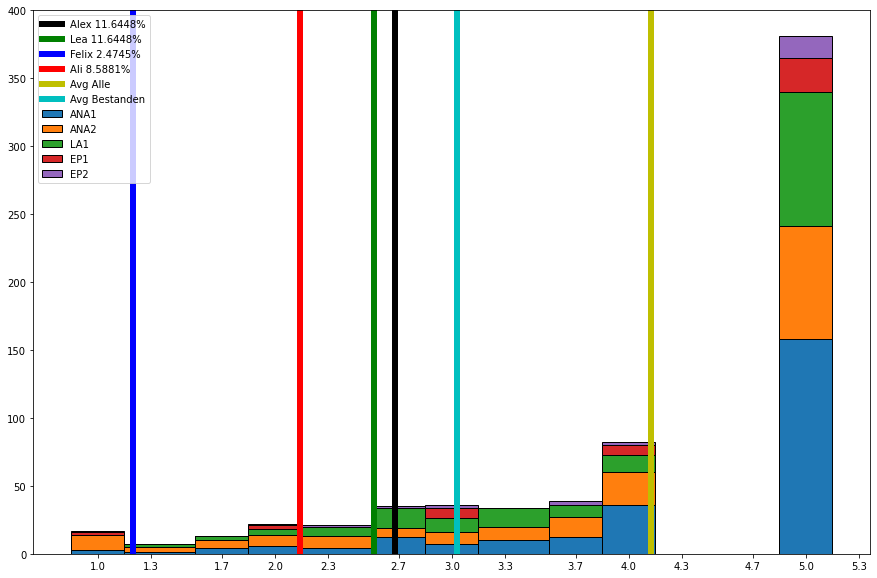

In [2]:
alex_avg=np.mean(alex_noten)
lea_avg=np.mean(leas_noten)
felix_avg=np.mean(felix_noten)
ali_avg=np.mean(ali_noten)



alle_zsm=np.array([])
for arr in alle:
    alle_zsm=np.append(alle_zsm,arr)

avg_all=np.mean(alle_zsm)
avg_bes=np.mean(alle_zsm[alle_zsm<=4.0])
    
    
alex_o=len(alle_zsm[alle_zsm<=alex_avg])/len(alle_zsm)*100
lea_o=len(alle_zsm[alle_zsm<=lea_avg])/len(alle_zsm)*100
felix_o=len(alle_zsm[alle_zsm<=felix_avg])/len(alle_zsm)*100
ali_o=len(alle_zsm[alle_zsm<=ali_avg])/len(alle_zsm)*100




alle=np.array([ana1_all,ana2_all,la1_all,ep1_all,ep2_all],dtype=object)
klausur_namen=np.array(["ANA1","ANA2","LA1","EP1","EP2"])

bins=np.array([1,1.3,1.7,2,2.3,2.7,3,3.3,3.7,4,4.3,4.7,5,5.3])-0.15
plt.hist(alle,stacked=True,edgecolor = "k",bins=bins)
plt.axvline(x=alex_avg,c='k',linewidth=6)
plt.axvline(x=lea_avg,c='g',linewidth=6)
plt.axvline(x=felix_avg,c='b',linewidth=6)
plt.axvline(x=ali_avg,c='r',linewidth=6)
plt.axvline(x=avg_all,c='y',linewidth=6)
plt.axvline(x=avg_bes,c='c',linewidth=6)

fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.legend(np.append(["Alex {:.4f}%".format(alex_o),"Lea {:.4f}%".format(lea_o),"Felix {:.4f}%".format(felix_o),"Ali {:.4f}%".format(ali_o),"Avg Alle", "Avg Bestanden"],klausur_namen))
_=plt.xticks(bins+0.15, bins+0.15)
plt.savefig(f"alle.pdf",dpi=300,transparent=False,format="pdf")


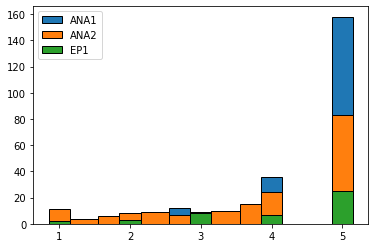

In [3]:
plt.figure()
bins=np.array([1,1.3,1.7,2,2.3,2.7,3,3.3,3.7,4,4.3,4.7,5,5.3])-0.15
plt.hist(ana1_all, bins, stacked=True,edgecolor = "k",label="ANA1")
plt.hist(ana2_all, bins, stacked=True,edgecolor = "k",label="ANA2")
plt.hist(ep1_all, bins, stacked=True,edgecolor = "k",label="EP1")

plt.legend()
plt.show()

In [4]:
len(alle_zsm[alle_zsm==5])

381